<a href="https://colab.research.google.com/github/telmacarvalho/tcc-smishing/blob/main/data_process_smishing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA e tratamento dos dados

## Importa bibliotecas

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Bibliotecas para carregar o dataset do Hugging Face
!pip install datasets -q
from datasets import load_dataset

## Extrai os dados

In [5]:
dataset_hf = load_dataset("MOZNLP/MOZ-Smishing")
dataset_hf

DatasetDict({
    test: Dataset({
        features: ['id', 'source', 'text', 'label'],
        num_rows: 2561
    })
})

In [13]:
df = pd.DataFrame(dataset_hf['test'])
df.head()

,id,source,text,label
0,1_0,sms,"Oi, peço para transferir aquele valor para meu...",Legitimate
1,2_0,sms,Bom dia babe..tudo bem? Não se esqueça de liga...,Legitimate
2,3_0,sms,AEN8AFWXJHC Confirmado. Compraste 19.00MT de ...,Legitimate
3,4_0,sms,"7GD04E51YZM. Caro Cliente, o codigo para efect...",Legitimate
4,5_0,sms,Bom dia babe. Está bem. Vou comprar.\nBoa viagem,Legitimate


## Analisa os dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2561 non-null   object
 1   source  2561 non-null   object
 2   text    2561 non-null   object
 3   label   2561 non-null   object
dtypes: object(4)
memory usage: 80.2+ KB


In [9]:
df.label.unique()

array(['Legitimate', 'Smishing'], dtype=object)

In [14]:
df.label.value_counts()

,count
label,
Legitimate,2009
Smishing,552


In [19]:
# Configuração de visualização
sns.set_style('whitegrid')
%matplotlib inline

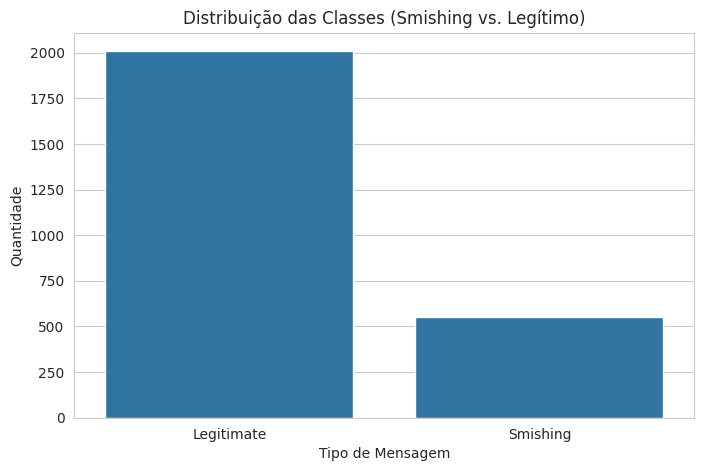

label
Legitimate    0.784459
Smishing      0.215541
Name: proportion, dtype: float64


In [25]:
# Análise da distribuição das classes
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribuição das Classes (Smishing vs. Legítimo)')
plt.xlabel('Tipo de Mensagem')
plt.ylabel('Quantidade')
plt.show()

print(df['label'].value_counts(normalize=True))

*Dados estão desbalanceados.*